# Energy as a Fundamental RIght (EFRI) Simulation
* In EFRI simulation model we have simulated the cases where all households receive free electricity and the financial burden of the free electricity is shared among only residential users.
* As the free electricity amount increases, the residential electricity unit price increases as well.

# I. Simulation Preparations

In [1]:
library(tidyverse)
library(ggplot2)
library(plotly)
library(hrbrthemes)
library(viridis)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: viridisLite



## Input Data
* In this simulation the [Residential Energy Consumption Survey (RECS) 2015](https://www.eia.gov/consumption/residential/data/2015/index.php?view=microdata) data is used as an input.

In [2]:
inputpath = "../input/efri-simulation/recs2015_public_v4.csv"
inputdata = read.csv(inputpath)

In [3]:
inputdata = inputdata[,c("DOEID","DIVISION","NHSLDMEM", "MONEYPY","ENERGYASST","NWEIGHT","KWH")]

## Transforming & Adding Necessary Columns
- The Electricity unit price will be added to calculate annual energy costs of a household.
- The cathogorical income data is transformed into numeric average for calculating ratio in income (RII).
- The share of energy expenditure in income, which we called “ratio in income (RII)” in short is added.
- Other cathegorical columns are added for visualization.

In [4]:
inputdata = cbind(inputdata,t(rep(0,5)))
colnames(inputdata)[8:12] = c("ElectricityUnitPrice","NumericIncome","RII","IncomeGroupName","DivisionName")
class(inputdata$ElectricityUnitPrice) = "Numeric"
class(inputdata$NumericIncome) = "Numeric"
class(inputdata$RII) = "Numeric"

### Electricity Unit Price
* The 2015 residential electricity unit prices are taken from [EIA Electric Sales, Revenue, and Average Price](https://www.eia.gov/electricity/sales_revenue_price/)


In [5]:
inputdata[inputdata$DIVISION == 1,"ElectricityUnitPrice"] = 19.43
inputdata[inputdata$DIVISION == 2,"ElectricityUnitPrice"] = 15.97
inputdata[inputdata$DIVISION == 3,"ElectricityUnitPrice"] = 12.96
inputdata[inputdata$DIVISION == 4,"ElectricityUnitPrice"] = 11.47
inputdata[inputdata$DIVISION == 5,"ElectricityUnitPrice"] = 11.74
inputdata[inputdata$DIVISION == 6,"ElectricityUnitPrice"] = 10.82
inputdata[inputdata$DIVISION == 7,"ElectricityUnitPrice"] = 10.95
inputdata[inputdata$DIVISION == 8,"ElectricityUnitPrice"] = 10.96
inputdata[inputdata$DIVISION == 9,"ElectricityUnitPrice"] = 12.45
inputdata[inputdata$DIVISION == 10,"ElectricityUnitPrice"] = 14.28

### Numeric Income Equivalents
* The cathogorical income data is transformed into numeric average.
    * The "Less than 20,000" group average is taken as USD 9,999.5 (Average of 0 and 19999)
    * The "20,000 - 39,999" group average is taken as USD 29,999.5
    * ...
    * The "140,000 or more" group average is assumed as USD 140,000

In [6]:
inputdata[inputdata$MONEYPY == 1,"NumericIncome"] = 9999.5
inputdata[inputdata$MONEYPY == 2,"NumericIncome"] = 29999.5
inputdata[inputdata$MONEYPY == 3,"NumericIncome"] = 49999.5
inputdata[inputdata$MONEYPY == 4,"NumericIncome"] = 69999.5
inputdata[inputdata$MONEYPY == 5,"NumericIncome"] = 89999.5
inputdata[inputdata$MONEYPY == 6,"NumericIncome"] = 109999.5
inputdata[inputdata$MONEYPY == 7,"NumericIncome"] = 129999.5
inputdata[inputdata$MONEYPY == 8,"NumericIncome"] = 140000

### The Raito in Income (RII)
* The calculation of RII is simply *division of electricity expenditure over total expenditure of a household*
* Here the electricity unit price is cent, whereas Numeric income is dollars. We did not divide unit price to 100 so that the RII will be calculated as percentage (%).

In [7]:
inputdata[,"RII"] = (inputdata$ElectricityUnitPrice*inputdata$KWH)/inputdata$NumericIncome

### Other Columns for Visualization
* The *Income Group Names* and *Division Names* are written for better understanding and visualization.

In [8]:
inputdata[inputdata$MONEYPY == 1,"IncomeGroupName"] = "1. Less than $20,000"
inputdata[inputdata$MONEYPY == 2,"IncomeGroupName"] = "2. $20,000 - $39,999"
inputdata[inputdata$MONEYPY == 3,"IncomeGroupName"] = "3. $40,000 - $59,999"
inputdata[inputdata$MONEYPY == 4,"IncomeGroupName"] = "4. $60,000 to $79,999"
inputdata[inputdata$MONEYPY == 5,"IncomeGroupName"] = "5. $80,000 to $99,999"
inputdata[inputdata$MONEYPY == 6,"IncomeGroupName"] = "6. $100,000 to $119,999"
inputdata[inputdata$MONEYPY == 7,"IncomeGroupName"] = "7. $120,000 to $139,999"
inputdata[inputdata$MONEYPY == 8,"IncomeGroupName"] = "8. $140,000 or more"

In [9]:
inputdata[inputdata$DIVISION == 1,"DivisionName"] = "New England"
inputdata[inputdata$DIVISION == 2,"DivisionName"] = "Middle Atlantic"
inputdata[inputdata$DIVISION == 3,"DivisionName"] = "East North Central"
inputdata[inputdata$DIVISION == 4,"DivisionName"] = "West North Central"
inputdata[inputdata$DIVISION == 5,"DivisionName"] = "South Atlantic"
inputdata[inputdata$DIVISION == 6,"DivisionName"] = "East South Central"
inputdata[inputdata$DIVISION == 7,"DivisionName"] = "West South Central"
inputdata[inputdata$DIVISION == 8,"DivisionName"] = "Mountain North"
inputdata[inputdata$DIVISION == 9,"DivisionName"] = "Mountain South"
inputdata[inputdata$DIVISION == 10,"DivisionName"] = "Pacific"

## Selecting a Region to Implement EFRI Simulation
* Since the electricity unit prices are different in each region in the USA, we will select only one region and use it for the simulation.
* Here we have selected the Middle Atlantic Region.
* If you have only one region with same electricity unit price, you can use your whole data.

In [10]:
inputdata = inputdata[inputdata$DIVISION == 2,]

In [11]:
head(inputdata)

,DOEID,DIVISION,NHSLDMEM,MONEYPY,ENERGYASST,NWEIGHT,KWH,ElectricityUnitPrice,NumericIncome,RII,IncomeGroupName,DivisionName
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5,10005,2,3,3,0,16717.67,3115.655,15.97,49999.5,0.9951502,"3. $40,000 - $59,999",Middle Atlantic
9,10009,2,4,5,0,14034.71,10422.424,15.97,89999.5,1.8494115,"5. $80,000 to $99,999",Middle Atlantic
18,10018,2,6,3,0,43752.29,2297.369,15.97,49999.5,0.7337870,"3. $40,000 - $59,999",Middle Atlantic
26,10026,2,1,6,0,17241.34,11845.598,15.97,109999.5,1.7197733,"6. $100,000 to $119,999",Middle Atlantic
30,10030,2,1,2,0,16004.63,12340.971,15.97,29999.5,6.5696197,"2. $20,000 - $39,999",Middle Atlantic
33,10033,2,1,1,0,27889.56,4267.968,15.97,9999.5,6.8162857,"1. Less than $20,000",Middle Atlantic


## Understanding Current Energy Poverty Level

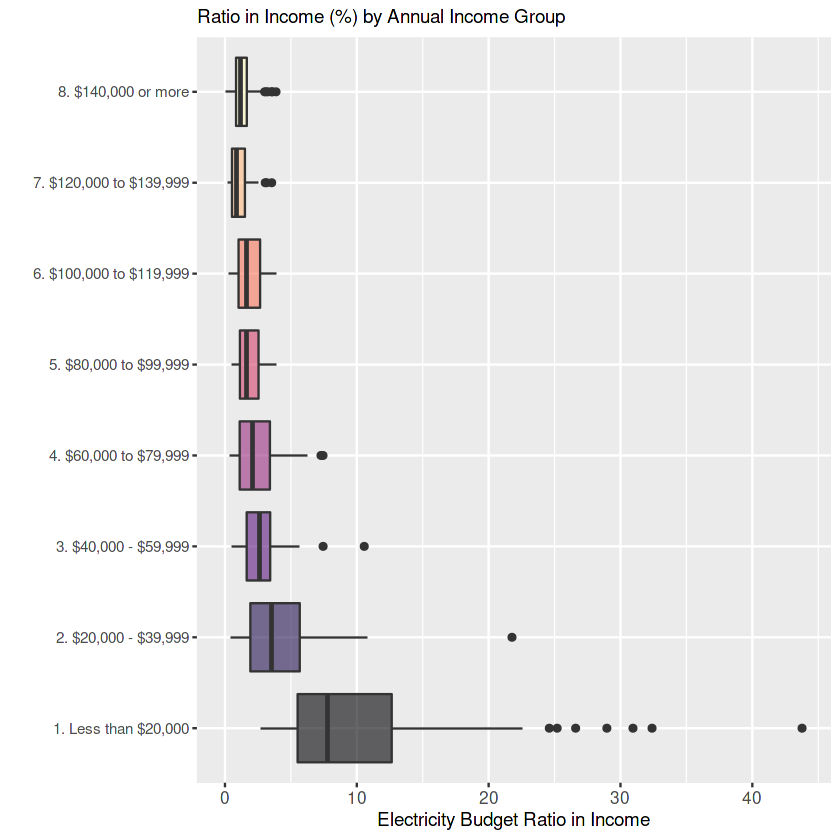

In [12]:
inputdata %>%
  ggplot( aes(x=IncomeGroupName, y=RII, fill=IncomeGroupName)) +
  geom_boxplot() +
  scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
  theme(axis.text.x = element_text(size=10),
        legend.position="none",
        plot.title = element_text(size=11)
  ) +
  ggtitle("Ratio in Income (%) by Annual Income Group") +
  xlab("")+
  ylab("Electricity Budget Ratio in Income")+
  coord_flip()

# II. EFRI Simulation

## Setting Simulation Input Columns

In [13]:
h = inputdata$NHSLDMEM # Number of residents in a household
i = inputdata$NumericIncome # Annual income of a household
c = inputdata$KWH # Annual electricity consumption of a household
p = mean(inputdata$ElectricityUnitPrice) # Defining the electricity price of the selected region per KWh
m = inputdata$NWEIGHT # Statistical multiplier for expressing how many households are represented by that row

* The statistical multiplier (m) is an optional input for the simulation.

## Checking Number of Simulation Cases
* Here the number of simulation cases will be calculated.
* The amount of free electricity cannot be more than total consumption in the population. Therefore the maximum amounts are calculated accordingly.

In [14]:
# Possible Free Electricity per Resident Cases
paste("Free Electricity per Resident will simulated from 0 to",trunc(sum(c * m) / sum(h * m)))

# Possible Free Electricity per Household Cases
paste("Free Electricity per Household will simulated from 0 to",trunc(sum(c * m) / sum(m)))

# Total Number of Combinations to be Simulated
paste("Total Free Electricity Pairs (# of rows in million):",round(trunc(sum(c * m) / sum(h * m)) * trunc(sum(c * m) / sum(m)) /1000000, digits=1))

[1] "Free Electricity per Resident will simulated from 0 to 3378"

[1] "Free Electricity per Household will simulated from 0 to 8465"

[1] "Total Free Electricity Pairs (# of rows in million): 28.6"

## EFRI Simulation Function

> **The EFRI function below tries every possible pair of free electricity and calculates the Ratio in Income (RII)**

* h: Household size (Number of residents) - list of numbers
* i: Annual income of a household - list of numbers
* c: Annual electricity consumption of a household - list of numbers
* p: Electricity price - numeric input or list of numbers (same unit as income)
* m: Statistical multiplier (number of represented households) - list of numbers
* epov: Energy poverty threshold (% of income)
* low : Income percentile threshold for selecting low income households

In [15]:
EFRI = function(h,i,c,p,m=1,epov=0.1,low=0.2,savename="EFRI_Sim")
 {
  
  start.time <- Sys.time()
  
  epr_limit = trunc(sum(c * m) / sum(h * m)) # Upper limit for free electricity  per resident (rounded down)
  eph_limit = trunc(sum(c * m) / sum(m)) # Upper limit for free electricity  per household (rounded down)
  
  datalist = list()
  counter = 1
  
  for(epr in 0:epr_limit)
  {
    for(eph in 0:eph_limit) # Computer RAM Consideration: Divide simulations if necessary (ex: 0:4500 and 4501:9000)
    {
      if(sum(epr*h*m)+sum(eph*m) > sum(c * m)) {
        next # EFRI Constraint: Total free electricity amount cannot be more than total consumed electricity in the population
      }
      rii_list = ((((sum((p*c)*m))/(sum((c-(pmin((epr*h+eph),c)))*m)))*((c-(pmin((epr*h+eph),c)))))/i)
      
      psim = sum((p*c)*m)/sum((c-(pmin((epr*h+eph),c)))*m)
      
      riiave = mean(rii_list) # Average Ratio in Income
      riiavelow = mean(rii_list[i<=quantile(i, probs=low)])
      
      riimed = median(rii_list) # Median Ratio in Income
      riimedlow = median(rii_list[i<=quantile(i, probs=low)])
      
      npr = sum(m[rii_list>=epov]*h[rii_list>=epov])
      nph = sum(m[rii_list>=epov])
      
      datalist [[counter]] = c(epr,eph,round(100*psim, digits = 2),round(100*riiave, digits = 2),round(100*riiavelow, digits = 2),round(100*riimed, digits = 2),round(100*riimedlow, digits = 2),round(npr, digits = 0),round(nph, digits = 0))
      counter = counter+1
    }
  }
  
  results = do.call(rbind, datalist)
  colnames(results) = c("EPR", "EPH","PSIM","RIIAVE","RIIAVELOW","RIIMED","RIIMEDLOW","NPR","NPH")
  
  EFRI_Sim <<- results
  
 
  csvpath <- paste(getwd(),"/", savename,".csv", sep = "")
  write.csv(EFRI_Sim, csvpath, row.names = FALSE)

  end.time <- Sys.time()
  time.taken <- end.time - start.time
  print(paste("* Simulation Duration: ", round(time.taken, digits = 2)), quote=FALSE)
  print(paste("** Simulation data is saved into ", savename, ".csv file at your current directory", sep = ""), quote=FALSE)

}

## Running the Simulation
* The simulation might take hours to complete, therefore here the uploaded EFRI simulation output files will be used.
* The following code can be run for different energy poverty (epov) and low-income (low) thresholds and data sets.

In [16]:
# EFRI(h, i, c, p, m, epov=0.1, low=0.2, savename="EFRI_Sim")

* Here the energy poverty threshold (epov) here is selected as 10%. In other words, a household is considered energy poor if the ratio of energy expenditure in total expenditures is more than 10%.
* The low-income threshold (low) is taken as 20%. This means the lowest quintile in the population in terms of income is considered as low-income households.

In [17]:
# rawpath <- "../input/efri-simulation/EFRI_Sim.csv"
# rawdata = read.csv(rawpath)

* Since the EFRI simulation take hours to complete, here we will use the pre-simulated EFRI outputs.
* The output data file of the simulation (the codes above) will not be run, instead the simulation output files (the code below) will be used.

In [18]:
rawpath <- "../input/efri-simulation/USA_2015_MiddleAtlantic.csv"
rawdata = read.csv(rawpath)

* Different output files can be selected for inspection (Ex: USA_2015_EastNorthCentral.csv)

# III. Preparing Data for Visualization

## Understanding Data Patterns

In [19]:
nrow(rawdata)
summary(rawdata)

[1] 14304082

      EPR            EPH            PSIM           RIIAVE        RIIAVELOW    
 Min.   :   0   Min.   :   0   Min.   :15.97   Min.   :3.260   Min.   :4.910  
 1st Qu.: 452   1st Qu.:1134   1st Qu.:29.68   1st Qu.:3.500   1st Qu.:5.790  
 Median : 989   Median :2479   Median :40.19   Median :3.650   Median :6.320  
 Mean   :1126   Mean   :2822   Mean   :40.64   Mean   :3.643   Mean   :6.277  
 3rd Qu.:1689   3rd Qu.:4233   3rd Qu.:51.61   3rd Qu.:3.760   3rd Qu.:6.780  
 Max.   :3378   Max.   :8465   Max.   :65.96   Max.   :4.160   Max.   :7.690  
     RIIMED        RIIMEDLOW          NPR               NPH         
 Min.   :0.000   Min.   :0.000   Min.   :2329587   Min.   : 863748  
 1st Qu.:0.530   1st Qu.:0.000   1st Qu.:2681401   1st Qu.:1071002  
 Median :1.240   Median :0.960   Median :2857505   Median :1180281  
 Mean   :1.171   Mean   :1.597   Mean   :2853882   Mean   :1201549  
 3rd Qu.:1.850   3rd Qu.:3.130   3rd Qu.:3007427   3rd Qu.:1325291  
 Max.   :2.440   Max.   :5.370   

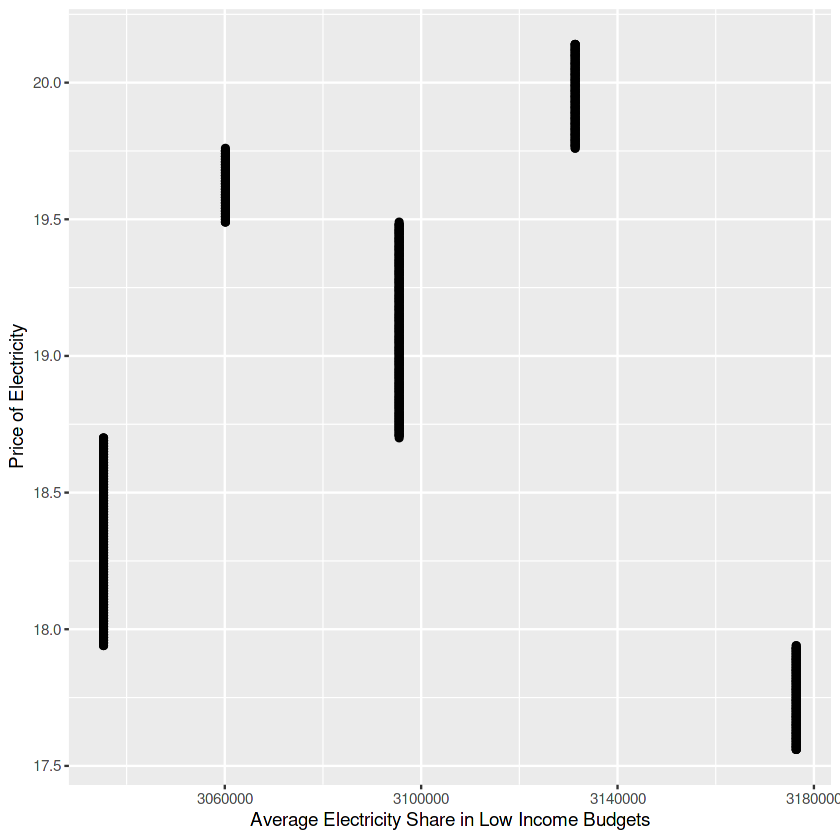

In [20]:
rawdata[5000:6000,] %>%
  ggplot(aes(x=NPR, y=PSIM)) + 
  geom_point() +
  xlab("Average Electricity Share in Low Income Budgets") +
  ylab("Price of Electricity")

* The raw simulation results include high number of rows.
* The patterns showed us that the same RII can be achieved by lower electricity unit prices.
* Therefore, for each objective (RIIAVE, RIIAVELOW, RIIMED, RIIMEDLOW, NPR, NPH) the output with the minimum electricity price can taken for each indicator instead of using the whole data.

## Aggregating Data for Visualization
* Here the data is aggregated. The lowest unit price of electricity is used for each indicator with the same output.

In [21]:
savename = "EFRI_Sim"

In [22]:
filter_ave    = aggregate(PSIM ~ RIIAVE,     data = rawdata, FUN = min)
filter_avelow = aggregate(PSIM ~ RIIAVELOW,  data = rawdata, FUN = min)
filter_med    = aggregate(PSIM ~ RIIMED,     data = rawdata, FUN = min)
filter_medlow = aggregate(PSIM ~ RIIMEDLOW,  data = rawdata, FUN = min)
filter_npr    = aggregate(PSIM ~ NPR,        data = rawdata, FUN = min)
filter_nph    = aggregate(PSIM ~ NPH,        data = rawdata, FUN = min)


agg_ave    = rawdata %>%
            filter(rawdata$PSIM == filter_ave$PSIM    | rawdata$RIIAVE    == filter_ave$RIIAVE)
agg_avelow = rawdata %>% 
            filter(rawdata$PSIM == filter_avelow$PSIM | rawdata$RIIAVELOW == filter_avelow$RIIAVELOW)
agg_med    = rawdata %>% 
            filter(rawdata$PSIM == filter_med$PSIM    | rawdata$RIIMED    == filter_med$RIIMED)
agg_medlow = rawdata %>% 
            filter(rawdata$PSIM == filter_medlow$PSIM | rawdata$RIIMEDLOW == filter_medlow$RIIMEDLOW)
agg_npr    = rawdata %>% 
            filter(rawdata$PSIM == filter_npr$PSIM    | rawdata$NPR       == filter_npr$NPR)
agg_nph    = rawdata %>% 
            filter(rawdata$PSIM == filter_nph$PSIM    | rawdata$NPH       == filter_nph$NPH)

simdata = rbind(agg_ave,agg_avelow,agg_med,agg_medlow,agg_npr,agg_nph) %>% distinct()

simpath = paste("./", savename, "_sim.csv", sep = "")
write.csv(simdata, simpath, row.names = FALSE)

rm(filter_ave, filter_avelow, filter_med, filter_medlow, filter_npr, filter_nph, agg_ave, agg_avelow, agg_med, agg_medlow, agg_npr, agg_nph)

Warning message in rawdata$PSIM == filter_ave$PSIM:
“longer object length is not a multiple of shorter object length”
Warning message in rawdata$RIIAVE == filter_ave$RIIAVE:
“longer object length is not a multiple of shorter object length”
Warning message in rawdata$PSIM == filter_avelow$PSIM:
“longer object length is not a multiple of shorter object length”
Warning message in rawdata$RIIAVELOW == filter_avelow$RIIAVELOW:
“longer object length is not a multiple of shorter object length”
Warning message in rawdata$PSIM == filter_med$PSIM:
“longer object length is not a multiple of shorter object length”
Warning message in rawdata$RIIMED == filter_med$RIIMED:
“longer object length is not a multiple of shorter object length”
Warning message in rawdata$PSIM == filter_medlow$PSIM:
“longer object length is not a multiple of shorter object length”
Warning message in rawdata$RIIMEDLOW == filter_medlow$RIIMEDLOW:
“longer object length is not a multiple of shorter object length”
Warning message 

In [23]:
head(simdata)

,EPR,EPH,PSIM,RIIAVE,RIIAVELOW,RIIMED,RIIMEDLOW,NPR,NPH
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0,49,16.06,3.75,7.03,2.41,5.32,3134442,1130084
2,0,139,16.23,3.74,7.01,2.41,5.27,3134442,1130084
3,0,230,16.41,3.74,6.99,2.41,5.28,3134442,1130084
4,0,320,16.59,3.73,6.97,2.40,5.27,3134442,1130084
5,0,411,16.78,3.73,6.95,2.38,5.28,3134442,1130084
6,0,502,16.97,3.73,6.93,2.35,5.24,3134442,1130084


## Selecting the Optimum Free Electricity Amounts

> Although the minimum RII values can be selected as the optimum points, we aimed to find a balance between the RII indicators and rising electricity unit price. The optimum values are selected as the points with the lowest Euclidean distance to the origin of electricity unit price and selected RII indicator.

In [24]:
normalizer <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

opt_init   = rawdata[which(rawdata$EPR == 0 & rawdata$EPH ==0),]
opt_ave    = rawdata[which.min(sqrt(normalizer(rawdata$RIIAVE)   ^2 + normalizer(rawdata$PSIM)^2)),]
opt_avelow = rawdata[which.min(sqrt(normalizer(rawdata$RIIAVELOW)^2 + normalizer(rawdata$PSIM)^2)),]
opt_med    = rawdata[which.min(sqrt(normalizer(rawdata$RIIMED)   ^2 + normalizer(rawdata$PSIM)^2)),]
opt_medlow = rawdata[which.min(sqrt(normalizer(rawdata$RIIMEDLOW)^2 + normalizer(rawdata$PSIM)^2)),]
opt_npr    = rawdata[which.min(sqrt(normalizer(rawdata$NPR)      ^2 + normalizer(rawdata$PSIM)^2)),]
opt_nph    = rawdata[which.min(sqrt(normalizer(rawdata$NPH)      ^2 + normalizer(rawdata$PSIM)^2)),]

opt_init   = cbind(opt_init,   Simulation = "INITIAL")
opt_ave    = cbind(opt_ave,    Simulation = "RIIAVE")
opt_avelow = cbind(opt_avelow, Simulation = "RIIAVELOW")
opt_med    = cbind(opt_med,    Simulation = "RIIMED")
opt_medlow = cbind(opt_medlow, Simulation = "RIIMEDLOW")
opt_npr    = cbind(opt_npr,    Simulation = "NPR")
opt_nph    = cbind(opt_nph,    Simulation = "NPH")

optdata = rbind(opt_init, opt_ave,opt_avelow, opt_med, opt_medlow, opt_npr, opt_nph)

optpath = paste("./", savename, "_opt.csv", sep = "")
write.csv(optdata, optpath, row.names = FALSE)

rm(opt_init,opt_ave,opt_avelow,opt_med,opt_medlow,opt_npr,opt_nph,optpath)

In [25]:
optdata

,EPR,EPH,PSIM,RIIAVE,RIIAVELOW,RIIMED,RIIMEDLOW,NPR,NPH,Simulation
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,0,0,15.97,3.75,7.04,2.41,5.37,3162044,1157686,INITIAL
3914,0,3913,27.81,3.46,5.85,1.88,2.62,3404294,1121345,RIIAVE
10728926,0,4414,30.08,3.43,5.69,1.66,1.94,3288084,1063240,RIIAVELOW
10959539,55,5993,39.94,3.34,5.29,0.96,0.00,3110473,1033319,RIIMED
10958419,55,4873,33.14,3.40,5.56,1.52,1.11,2970615,1043087,RIIMEDLOW
4157789,982,0,22.30,3.78,6.97,2.10,4.71,2475819,1196072,NPR
2875,0,2874,23.73,3.55,6.19,2.04,3.42,3151209,1044422,NPH


# IV. Simulated Data & Plots

## Loading the Simulated Data
* The following code is for the ones who already have the simulation output files and would like to skip the previous steps.

In [26]:
savename = "EFRI_Sim"
simpath = paste("./", savename, "_sim.csv", sep = "")
optpath = paste("./", savename, "_opt.csv", sep = "")

simdata = read.csv(simpath)
optdata = read.csv(optpath)

## Visualization
Although, different RII indicators can be used based on the aim of a free electricity policy, we have regarded the number of residents suffering from energy poverty as the most important indicator and selected **Number of Energy Poor Residents (NPR)** as our primary indicator, and used it for coloring the visuals.

## 2D Plots

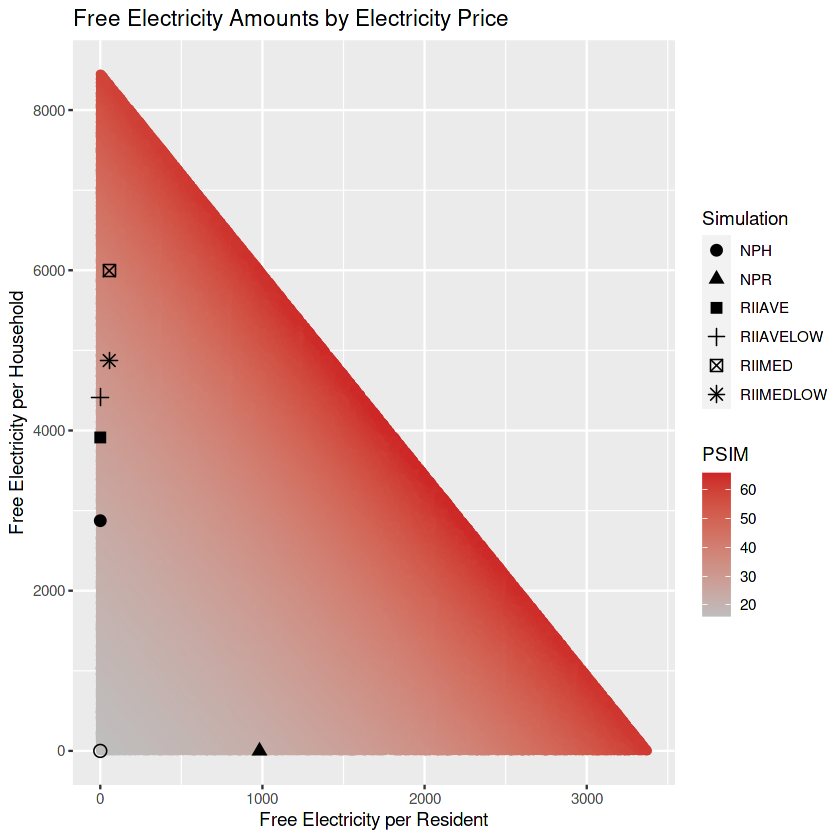

In [27]:
# EPR vs EPH by Price
simdata %>%
  ggplot(aes(x=EPR, y=EPH, color=PSIM)) + 
  geom_point() +
  scale_color_gradient(low="gray", high="firebrick3") +
  xlab("Free Electricity per Resident") +
  ylab("Free Electricity per Household") +
  ggtitle("Free Electricity Amounts by Electricity Price")+
  geom_point(data=optdata[2:7,], 
             aes(x=EPR,y=EPH, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=EPR,y=EPH),  
             color= "black", shape=1,
             size=3)

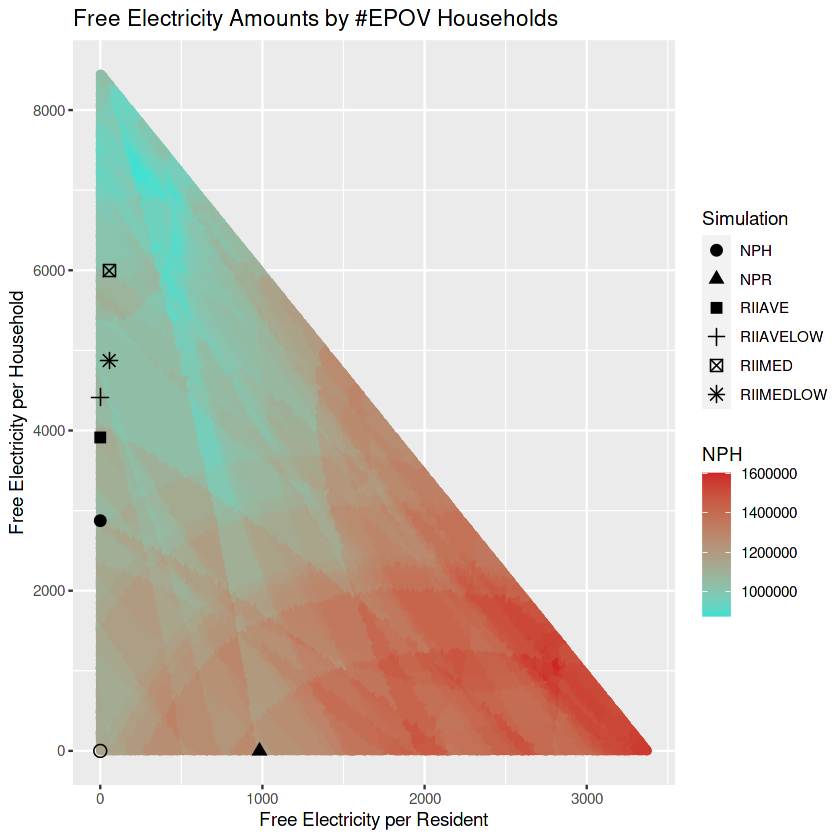

In [28]:
# EPR vs EPH by NPH
simdata %>%
  ggplot(aes(x=EPR, y=EPH, color=NPH)) + 
  geom_point() +
  scale_color_gradient(low="turquoise", high="firebrick3") +
  xlab("Free Electricity per Resident") +
  ylab("Free Electricity per Household") +
  ggtitle("Free Electricity Amounts by #EPOV Households")+
  geom_point(data=optdata[2:7,], 
             aes(x=EPR,y=EPH, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=EPR,y=EPH),  
             color= "black", shape=1,
             size=3)

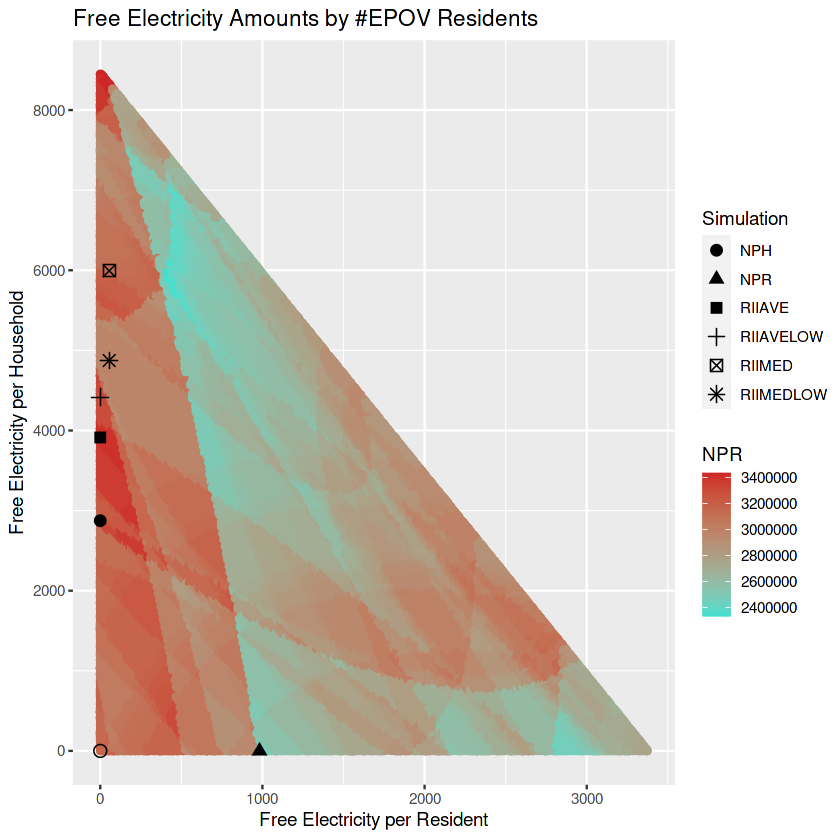

In [29]:
# EPR vs EPH by NPR
simdata %>%
  ggplot(aes(x=EPR, y=EPH, color=NPR)) + 
  geom_point() +
  scale_color_gradient(low="turquoise", high="firebrick3") +
  xlab("Free Electricity per Resident") +
  ylab("Free Electricity per Household") +
  ggtitle("Free Electricity Amounts by #EPOV Residents")+
  geom_point(data=optdata[2:7,], 
             aes(x=EPR,y=EPH, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=EPR,y=EPH),  
             color= "black", shape=1,
             size=3)

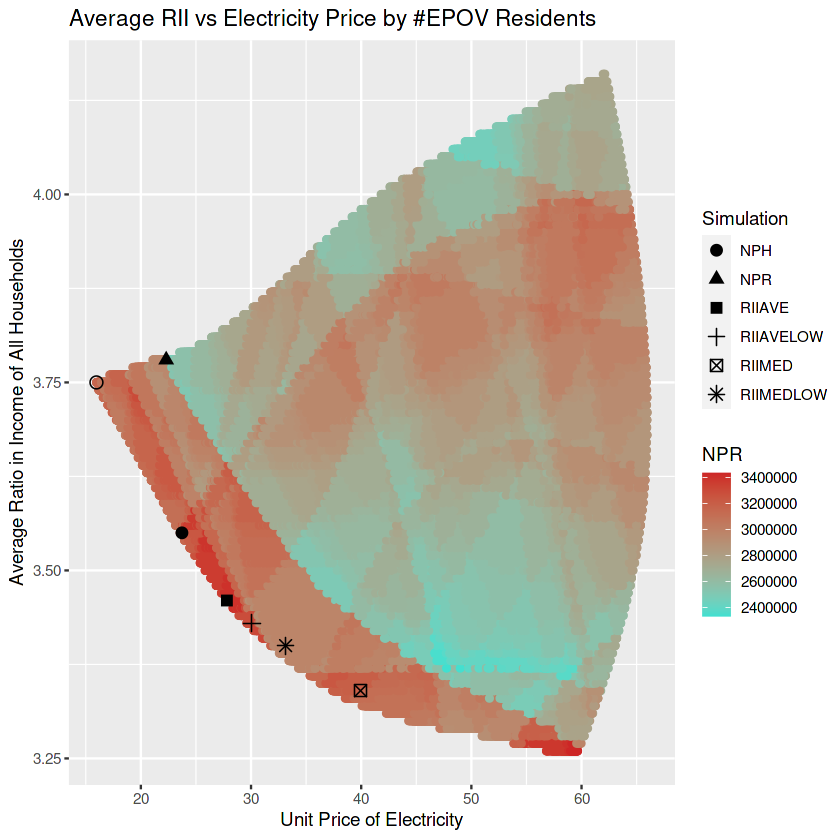

In [30]:
# Price vs RIIAVE
simdata %>%
  ggplot(aes(x=PSIM, y=RIIAVE, color=NPR)) + 
  geom_point() +
  scale_color_gradient(low="turquoise", high="firebrick3") +
  xlab("Unit Price of Electricity") +
  ylab("Average Ratio in Income of All Households") +
  ggtitle("Average RII vs Electricity Price by #EPOV Residents")+
  geom_point(data=optdata[2:7,], 
             aes(x=PSIM,y=RIIAVE, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=PSIM,y=RIIAVE),  
             color= "black", shape=1,
             size=3)

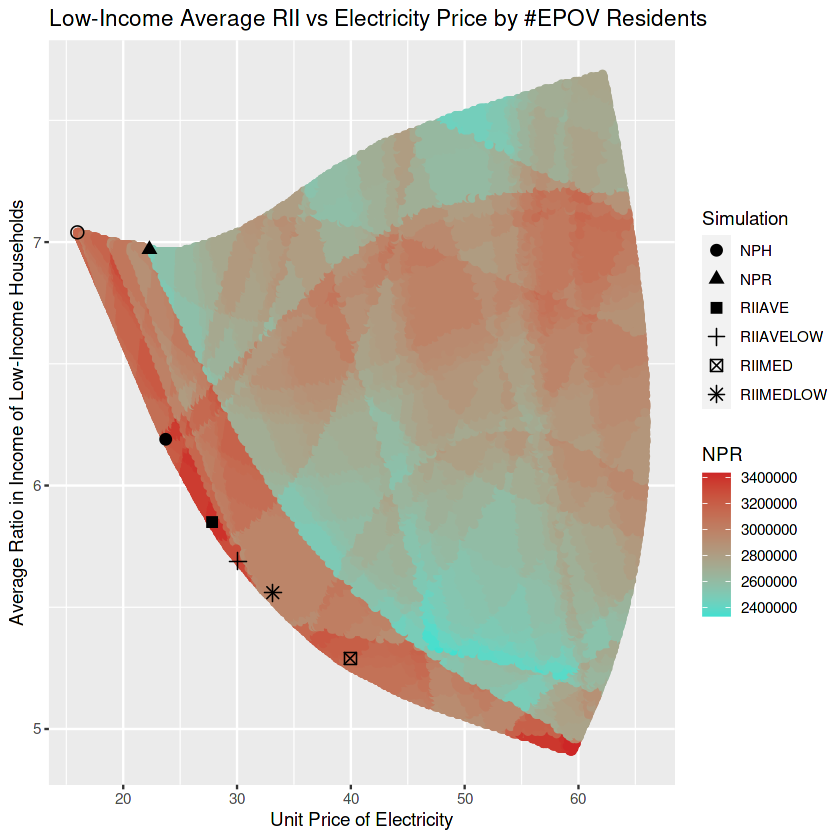

In [31]:
# Price vs RIIAVELOW
simdata %>%
  ggplot(aes(x=PSIM, y=RIIAVELOW, color=NPR)) + 
  geom_point() +
  scale_color_gradient(low="turquoise", high="firebrick3") +
  xlab("Unit Price of Electricity") +
  ylab("Average Ratio in Income of Low-Income Households") +
  ggtitle("Low-Income Average RII vs Electricity Price by #EPOV Residents")+
  geom_point(data=optdata[2:7,], 
             aes(x=PSIM,y=RIIAVELOW, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=PSIM,y=RIIAVELOW),  
             color= "black", shape=1,
             size=3)

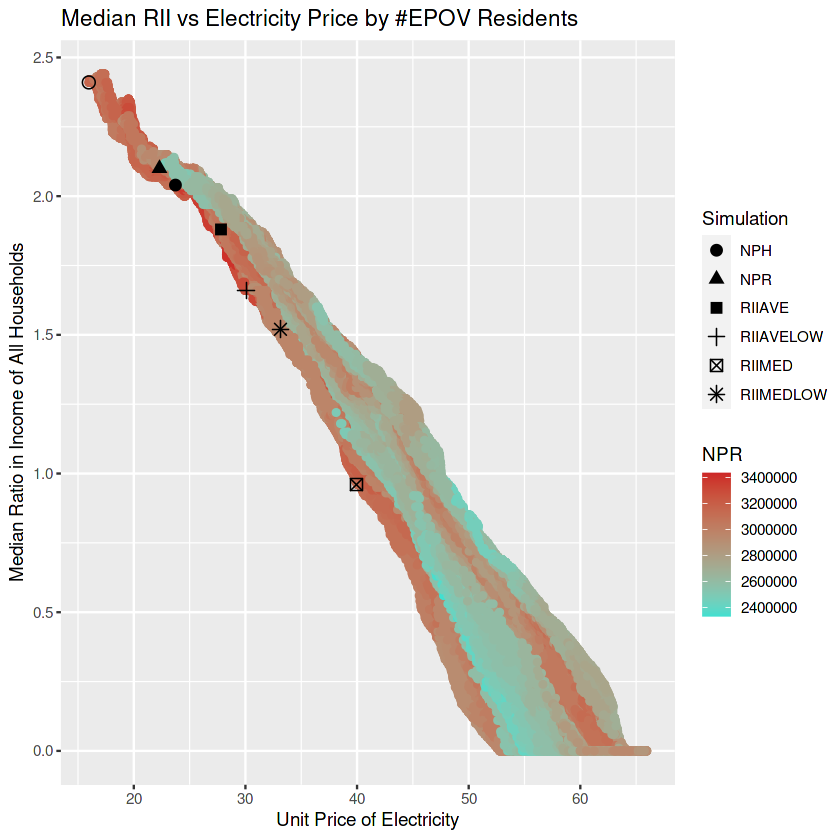

In [32]:
# Price vs RIIMED
simdata %>%
  ggplot(aes(x=PSIM, y=RIIMED, color=NPR)) + 
  geom_point() +
  scale_color_gradient(low="turquoise", high="firebrick3") +
  xlab("Unit Price of Electricity") +
  ylab("Median Ratio in Income of All Households") +
  ggtitle("Median RII vs Electricity Price by #EPOV Residents")+
  geom_point(data=optdata[2:7,], 
             aes(x=PSIM,y=RIIMED, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=PSIM,y=RIIMED),  
             color= "black", shape=1,
             size=3)

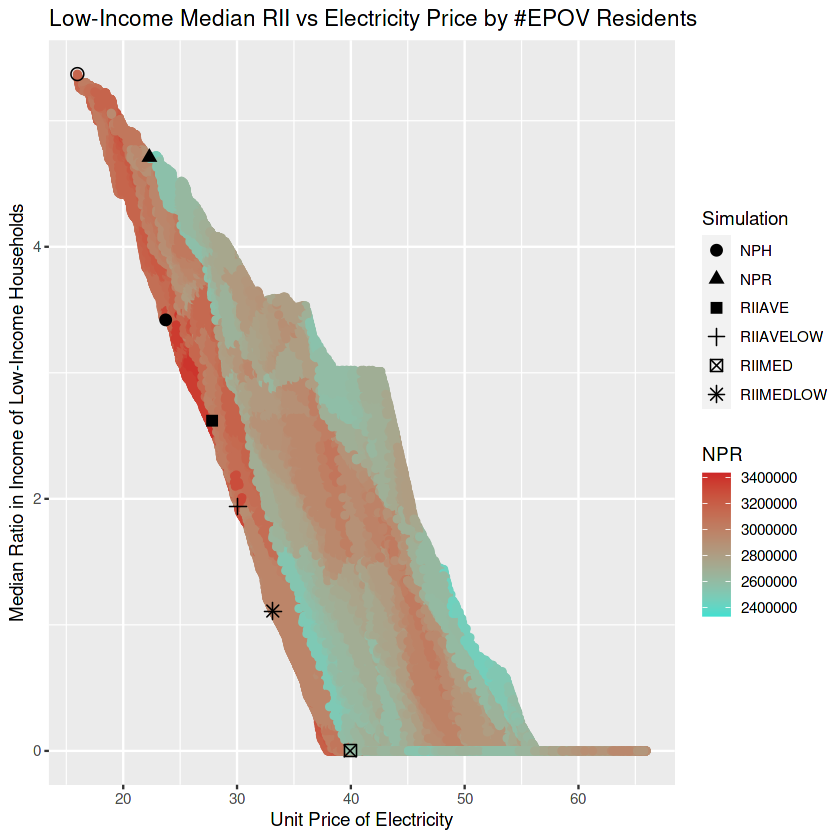

In [33]:
# Price vs RIIMEDLOW
simdata %>%
  ggplot(aes(x=PSIM, y=RIIMEDLOW, color=NPR)) + 
  geom_point() +
  scale_color_gradient(low="turquoise", high="firebrick3") +
  xlab("Unit Price of Electricity") +
  ylab("Median Ratio in Income of Low-Income Households") +
  ggtitle("Low-Income Median RII vs Electricity Price by #EPOV Residents")+
  geom_point(data=optdata[2:7,], 
             aes(x=PSIM,y=RIIMEDLOW, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=PSIM,y=RIIMEDLOW),  
             color= "black", shape=1,
             size=3)

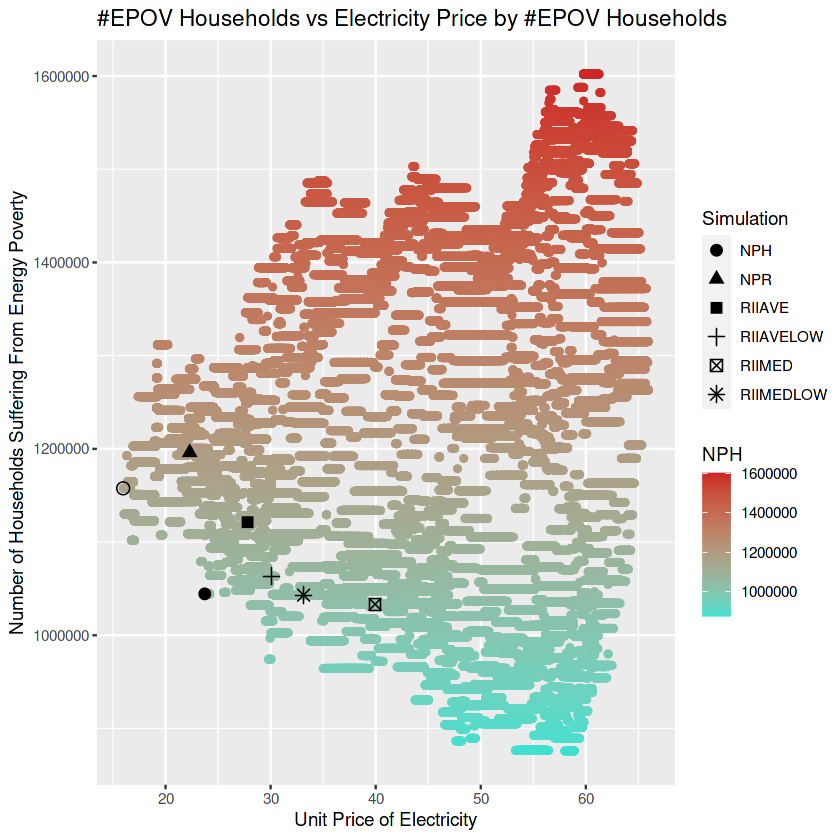

In [34]:
# Price vs NPH
simdata %>%
  ggplot(aes(x=PSIM, y=NPH, color=NPH)) + 
  geom_point() +
  scale_color_gradient(low="turquoise", high="firebrick3") +
  xlab("Unit Price of Electricity") +
  ylab("Number of Households Suffering From Energy Poverty") +
  ggtitle("#EPOV Households vs Electricity Price by #EPOV Households")+
  geom_point(data=optdata[2:7,], 
             aes(x=PSIM,y=NPH, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=PSIM,y=NPH),  
             color= "black", shape=1,
             size=3)

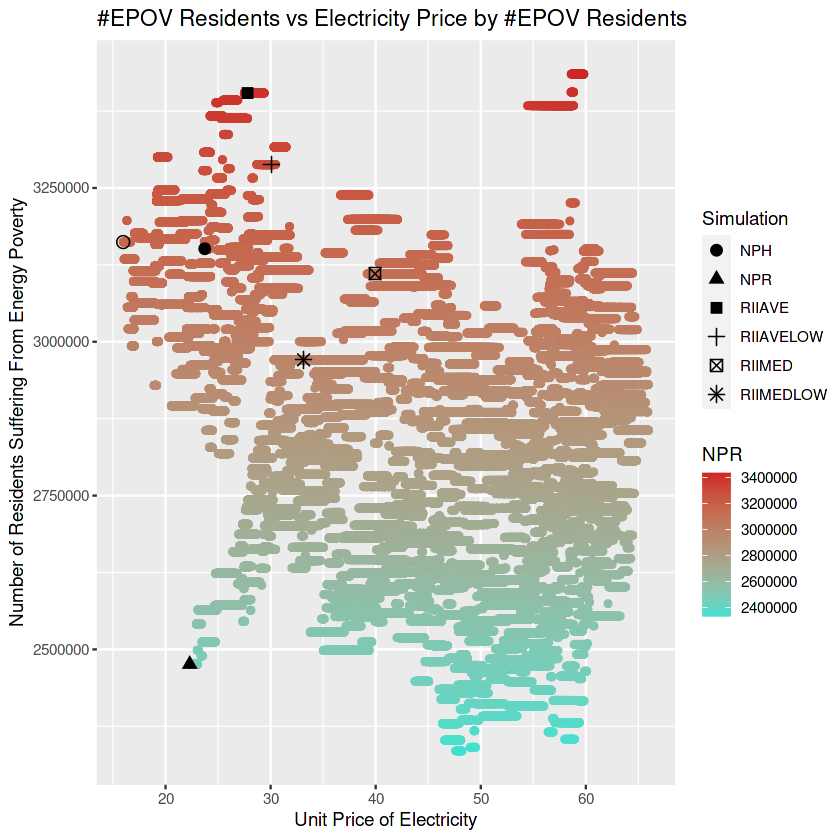

In [35]:
# Price vs NPR
simdata %>%
  ggplot(aes(x=PSIM, y=NPR, color=NPR)) + 
  geom_point() +
  scale_color_gradient(low="turquoise", high="firebrick3") +
  xlab("Unit Price of Electricity") +
  ylab("Number of Residents Suffering From Energy Poverty") +
  ggtitle("#EPOV Residents vs Electricity Price by #EPOV Residents")+
  geom_point(data=optdata[2:7,], 
             aes(x=PSIM,y=NPR, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=PSIM,y=NPR),  
             color= "black", shape=1,
             size=3)

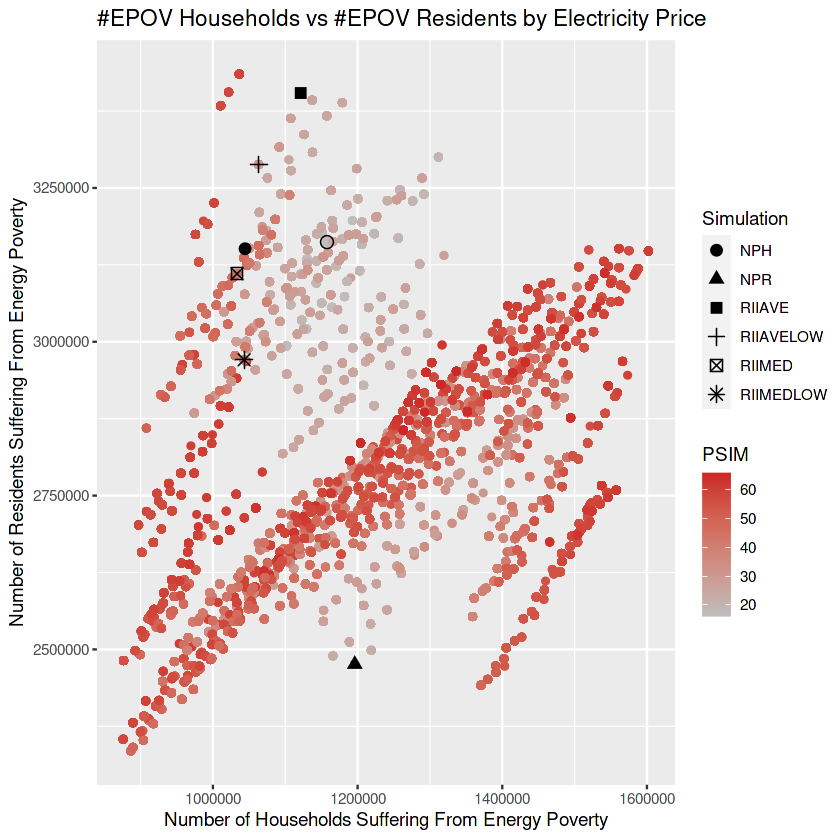

In [36]:
# NPH vs NPR
simdata %>%
  ggplot(aes(x=NPH, y=NPR, color=PSIM)) + 
  geom_point() +
  scale_color_gradient(low="gray", high="firebrick3") +
  xlab("Number of Households Suffering From Energy Poverty") +
  ylab("Number of Residents Suffering From Energy Poverty") +
  ggtitle("#EPOV Households vs #EPOV Residents by Electricity Price")+
  geom_point(data=optdata[2:7,], 
             aes(x=NPH,y=NPR, shape= Simulation), 
             color= "black", 
             size=3) +
  geom_point(data=optdata[1,], 
             aes(x=NPH,y=NPR),  
             color= "black", shape=1,
             size=3)

## 3D Plot

In [ ]:
sim3d = plot_ly(simdata, x = ~EPR, y = ~EPH, z = ~PSIM,
                         marker = list(color = ~NPR, colorscale = c('#FFE1A1', '#683531'), showscale = TRUE))
sim3d = sim3d %>% add_markers()
sim3d = sim3d %>% layout(scene = list(xaxis = list(title = 'Free Electricity per Resident'),
                                             yaxis = list(title = 'Free Electricity per Household'),
                                             zaxis = list(title = 'Electricity Unit Price')),
                                annotations = list(
                                  x = 1.13,
                                  y = 1.05,
                                  text = '# People Suffering From EPOV',
                                  xref = 'paper',
                                  yref = 'paper',
                                  showarrow = FALSE
                                ))

sim3d

# V. Pre-Simulation vs Post-Simulation Comparison

## Selecting the Simulation Case for Comparison

The optimum cases are written into the optdata table with the following order:

1. INITIAL: Initial case without granted free electricity
2. RIIAVE: The case where the population average "ratio in income" is minimized
3. RIIAVELOW: The case where the low-income average "ratio in income" is minimized
4. RIIMED: The case where the population median"ratio in income" is minimized
5. RIIMEDLOW: The case where the low-income median"ratio in income" is minimized
6. NPR: The case where the number of residents with energy poverty is minimized
7. NPH: The case where the number of households with energy poverty is minimized

- Here the NPR case, the case that minimized number of residents with energy poverty, will be inspected

In [38]:
case = 6

In [39]:
EPR = optdata[case,"EPR"]
EPH = optdata[case,"EPH"]
PRICEsim = optdata[case,"PSIM"]

EPR # Free Electrcity per Resident
EPH # Free Electrcity per Household
PRICEsim # New Electricity Price

[1] 982

[1] 0

[1] 22.3

## Adding Necessary Columns to the Initial Data Table
* PRICEsim: New Electricity Price after providing free electricity
* KWHgrant: Total Granted Free Electricity for a household
* KWHgrcons: Consumed Amount of Free Electricity for a household
* KWHpaid: Amount of Paid Electricity for the households where the free electricity amount is exceeded
* RIIsim: New Ratio in Income for a household

In [40]:
comparisondata = cbind(inputdata,PRICEsim)
  names(comparisondata)[length(names(comparisondata))]<-"PRICEsim"

comparisondata = cbind(comparisondata,EPR*comparisondata$NHSLDMEM + EPH)
  names(comparisondata)[length(names(comparisondata))]<-"KWHgrant"
  
  comparisondata = cbind(comparisondata,pmin(comparisondata$KWHgrant,comparisondata$KWH))
 names(comparisondata)[length(names(comparisondata))]<-"KWHgrcons"
  
 comparisondata = cbind(comparisondata,comparisondata$KWH - comparisondata$KWHgrcons)
 names(comparisondata)[length(names(comparisondata))]<-"KWHpaid"

 comparisondata = cbind(comparisondata,(comparisondata$PRICEsim*comparisondata$KWHpaid)/comparisondata$NumericIncome)
 names(comparisondata)[length(names(comparisondata))]<-"RIIsim"
 
 colnames(comparisondata)

[1] "DOEID"                "DIVISION"             "NHSLDMEM"            
 [4] "MONEYPY"              "ENERGYASST"           "NWEIGHT"             
 [7] "KWH"                  "ElectricityUnitPrice" "NumericIncome"       
[10] "RII"                  "IncomeGroupName"      "DivisionName"        
[13] "PRICEsim"             "KWHgrant"             "KWHgrcons"           
[16] "KWHpaid"              "RIIsim"

## Box-Plot of the Simulation Case

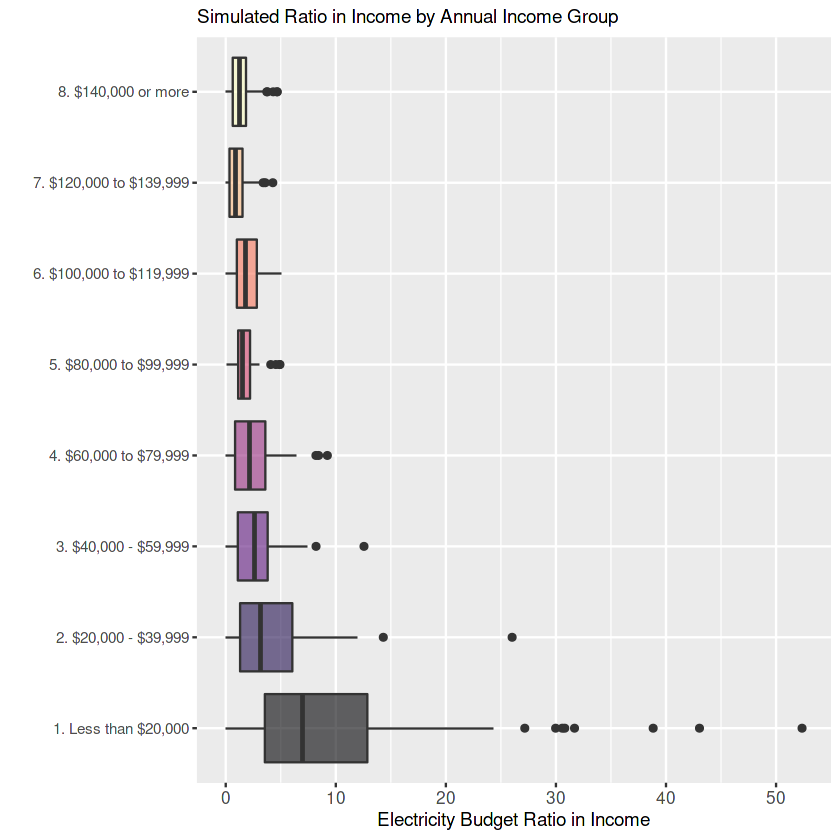

In [41]:
comparisondata %>%
   ggplot( aes(x=IncomeGroupName, y=RIIsim, fill=IncomeGroupName)) +
   geom_boxplot() +
   scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
   theme_get() +
   theme(axis.text.x = element_text(size=10),
         legend.position="none",
         plot.title = element_text(size=11)
   ) +
   ggtitle("Simulated Ratio in Income by Annual Income Group") +
   xlab("")+
   ylab("Electricity Budget Ratio in Income")+
   coord_flip()

## Comparison of Each Income Level by Its Initial Situation

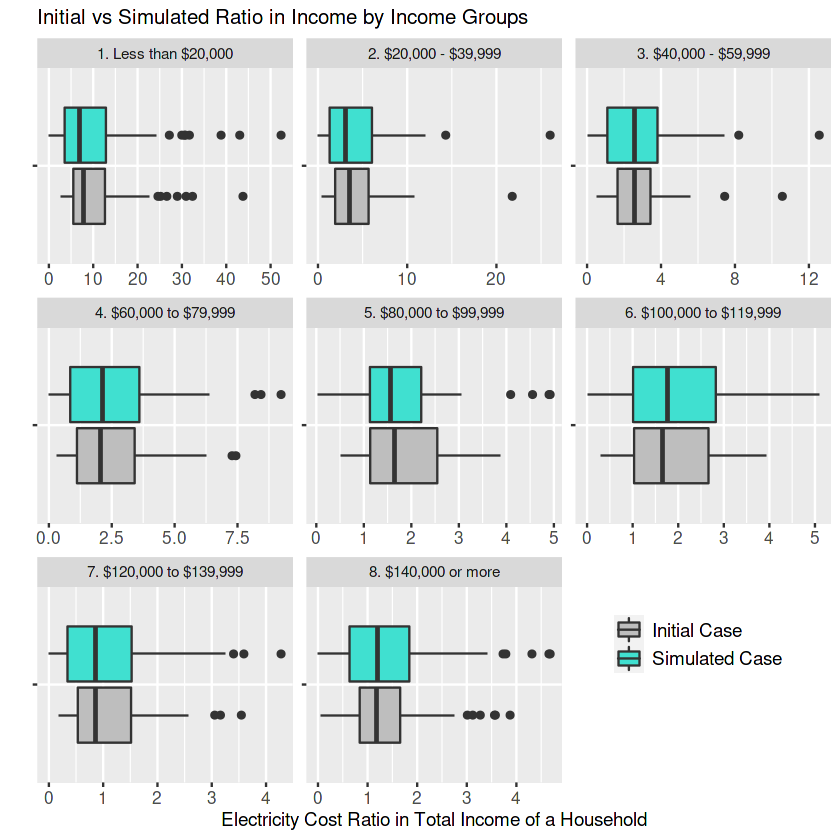

In [42]:
 a_ = comparisondata[,"IncomeGroupName"] %>% cbind(comparisondata[,"RII"], rep("Initial Case",nrow(comparisondata))) 
 b_ = comparisondata[,"IncomeGroupName"] %>% cbind(comparisondata[,"RIIsim"], rep("Simulated Case",nrow(comparisondata))) 
   
   comparisonplot = data.frame(rbind(a_,b_))
   comparisonplot[,2] = as.numeric(comparisonplot[,2])
   colnames(comparisonplot) = c("Group","RII","Case")
   
    comparisonplot %>%
     ggplot( aes(x=Group, y=RII, fill=Case)) +
     geom_boxplot() +
     facet_wrap(~Group, scale="free") +
     scale_fill_manual(values = c("grey", "turquoise")) +
     theme_get() +
     theme(axis.text.x = element_text(size=10),
           axis.text.y = element_blank(),
           legend.position=c(0.83,0.2),
           legend.title = element_blank(),
           legend.text = element_text(size=11),
           plot.title = element_text(size=12)
     ) +
    scale_shape_manual(values= c(1,19)) +
     ggtitle("Initial vs Simulated Ratio in Income by Income Groups") +
     xlab("")+
     ylab("Electricity Cost Ratio in Total Income of a Household")+
     coord_flip()

## Reduction in the Number of Residents with Energy Poverty

### 1. Whole Population

In [43]:
EPOV_init = comparisondata %>% filter(RII>=10)
EPOV_init_total = sum(EPOV_init$NWEIGHT*EPOV_init$NHSLDMEM)

EPOV_sim = comparisondata %>% filter(RIIsim>=10)
EPOV_sim_total = sum(EPOV_sim$NWEIGHT*EPOV_sim$NHSLDMEM)

print("COMPARISON: Number of Total Energy Poor Residents")

print(paste("Initial Case:",round(EPOV_init_total, digits=0)))
print(paste("Simulated Case:",round(EPOV_sim_total, digits=0)))
print(paste("Difference (Number of Residents):",round(EPOV_init_total - EPOV_sim_total, digits=0)))
print(paste("Improvement (Number of Residents): %",100*round((EPOV_init_total - EPOV_sim_total)/EPOV_init_total, digits=4)))

[1] "COMPARISON: Number of Total Energy Poor Residents"
[1] "Initial Case: 3162044"
[1] "Simulated Case: 2475819"
[1] "Difference (Number of Residents): 686225"
[1] "Improvement (Number of Residents): % 21.7"


### 2. Low-Income Households

In [44]:
LowIncome = comparisondata %>% filter(MONEYPY <= quantile(MONEYPY, probs=0.2))
  
EPOV_init = LowIncome %>% filter(RII>=10)
EPOV_init_total = sum(EPOV_init$NWEIGHT*EPOV_init$NHSLDMEM)

EPOV_sim = LowIncome %>% filter(RIIsim>=10)
EPOV_sim_total = sum(EPOV_sim$NWEIGHT*EPOV_sim$NHSLDMEM)

print("COMPARISON: Number of Energy Poor Low-Income Residents")

print(paste("Initial Case:",round(EPOV_init_total, digits=0)))
print(paste("Simulated Case:",round(EPOV_sim_total, digits=0)))
print(paste("Difference (Number of Residents):",round(EPOV_init_total - EPOV_sim_total, digits=0)))
print(paste("Improvement (Number of Residents): %",100*round((EPOV_init_total - EPOV_sim_total)/EPOV_init_total, digits=4)))

[1] "COMPARISON: Number of Energy Poor Low-Income Residents"
[1] "Initial Case: 3055576"
[1] "Simulated Case: 2369351"
[1] "Difference (Number of Residents): 686225"
[1] "Improvement (Number of Residents): % 22.46"


### 3. Low-Income Households without Energy Assistance

In [45]:
LowIncomeNoAssistance = comparisondata %>% filter(MONEYPY <= quantile(MONEYPY, probs=0.2),ENERGYASST==0)
  
EPOV_init = LowIncomeNoAssistance %>% filter(RII>=10)
EPOV_init_total = sum(EPOV_init$NWEIGHT*EPOV_init$NHSLDMEM)

EPOV_sim = LowIncomeNoAssistance %>% filter(RIIsim>=10)
EPOV_sim_total = sum(EPOV_sim$NWEIGHT*EPOV_sim$NHSLDMEM)

print("COMPARISON: Number of Energy Poor Low-Income Residents without Energy Assistance")

print(paste("Initial Case:",round(EPOV_init_total, digits=0)))
print(paste("Simulated Case:",round(EPOV_sim_total, digits=0)))
print(paste("Difference (Number of Residents):",round(EPOV_init_total - EPOV_sim_total, digits=0)))
print(paste("Improvement (Number of Residents): %",100*round((EPOV_init_total - EPOV_sim_total)/EPOV_init_total, digits=4)))

[1] "COMPARISON: Number of Energy Poor Low-Income Residents without Energy Assistance"
[1] "Initial Case: 1874508"
[1] "Simulated Case: 1600300"
[1] "Difference (Number of Residents): 274207"
[1] "Improvement (Number of Residents): % 14.63"
